In [68]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# extracting the features from excel file to a dataframe
features_df = pd.read_excel("Healthcare_dataset.xlsx")
features_df

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [70]:
# extracting the dataset from excel file to a dataframe
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name="Dataset")
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [71]:
# checking info to get the idea of data types, missing values, no. of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [72]:
# checking for null values
df.isna().any().sum()

0

In [73]:
# Printing the count of all the categories in each columns to understand the distribution
for i in range(len(df.columns)):
    print(df[df.columns[i]].value_counts(),"\n")

Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: count, Length: 3424, dtype: int64 

Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64 

Gender
Female    3230
Male       194
Name: count, dtype: int64 

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64 

Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64 

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64 

Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64 

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                

In [74]:
# storing numerical columns into a seperate list for ease of use
numerical_cols = ["Dexa_Freq_During_Rx", "Count_Of_Risks"]

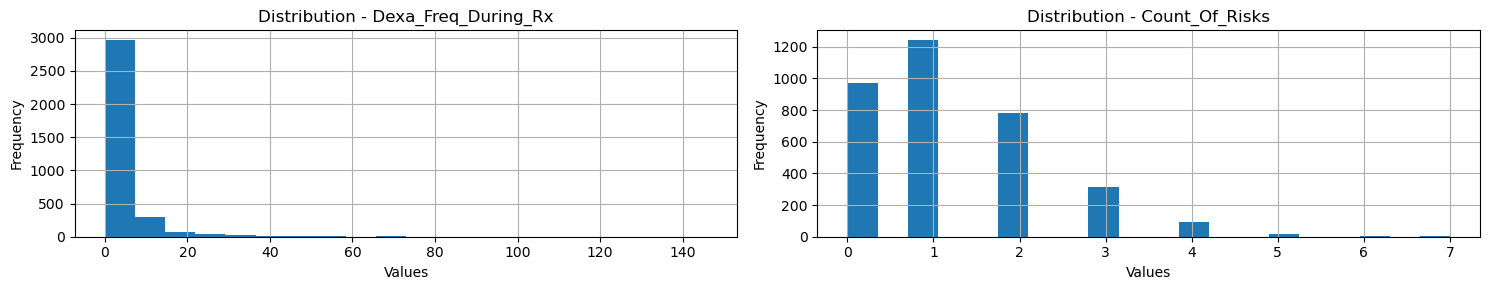

In [75]:
# Creating plots for the numerical values to get an idea of the distribution of values

# Number of subplots to create
num_subplots = 1

# Create subplots organized in rows of 1 for distribution
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through the columns and plot distribution
for i, column_name in enumerate(numerical_cols):
    ax_dist = axes[i]
    df[column_name].hist(ax=ax_dist, bins=20)
    ax_dist.set_title(f'Distribution - {column_name}')
    ax_dist.set_xlabel('Values')
    ax_dist.set_ylabel('Frequency')


# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

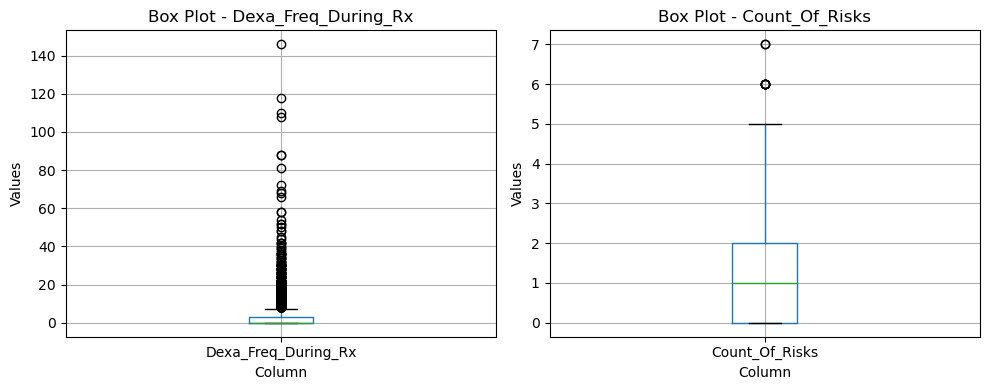

In [76]:
# Creating Boxplots of numerical columns to get an idea of the outliers

# Number of subplots to create
num_subplots = 1

# Create subplots organized in rows of 1 for outliers
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 4))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through the columns and plot box plot for outliers
for i, column_name in enumerate(numerical_cols):
    ax_outliers = axes[i]
    # Ensure that the column_name is a string
    df.boxplot(column=column_name, ax=ax_outliers)  # Note the square brackets around column_name
    ax_outliers.set_title(f'Box Plot - {column_name}')
    ax_outliers.set_xlabel('Column')
    ax_outliers.set_ylabel('Values')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

In [77]:
# As the data is positively skewed, we can try to use log1p transformation to make it more normal
for i in numerical_cols:
    df[i] = np.log1p(df[i])

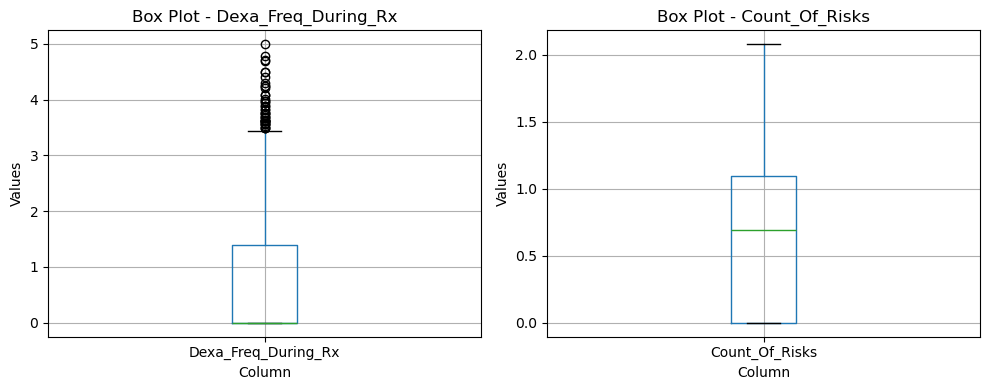

In [78]:
# Creating boxplots of the numerical columns after transformation

# Number of subplots to create
num_subplots = 1

# Create subplots organized in rows of 1 for outliers
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 4))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through the columns and plot box plot for outliers
for i, column_name in enumerate(numerical_cols):
    ax_outliers = axes[i]
    # Ensure that the column_name is a string
    df.boxplot(column=column_name, ax=ax_outliers)  # Note the square brackets around column_name
    ax_outliers.set_title(f'Box Plot - {column_name}')
    ax_outliers.set_xlabel('Column')
    ax_outliers.set_ylabel('Values')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

In [79]:
# Dropping Patient ID column as it is of no use in our analysis
df.drop(["Ptid"], axis=1, inplace=True)

In [82]:
# Encoding the columns from string to numerical data for training our Machine Learning model

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to multiple categorical columns
categorical_columns = df.columns

for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

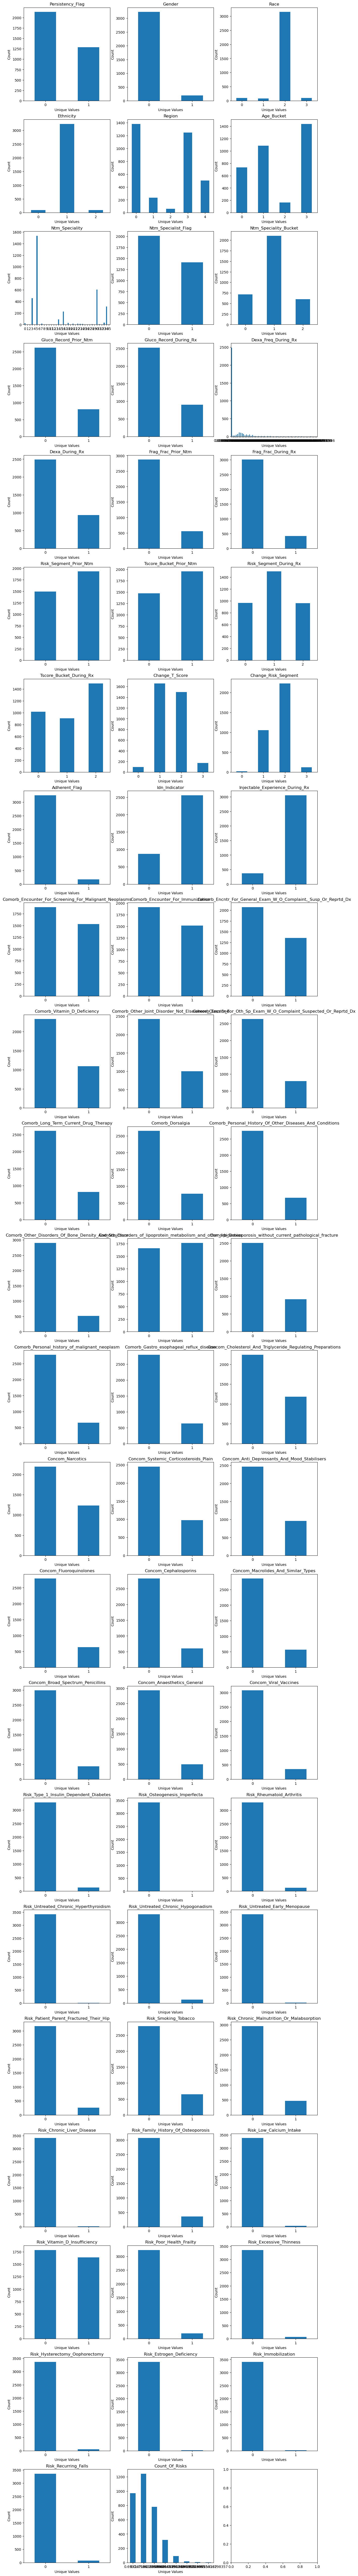

In [84]:
# Creating plots for value counts of each column

# Number of subplots to create
num_subplots = len(df.columns)


# Create subplots organized in rows of 3
num_rows = (num_subplots + 2) // 3  # Ceiling division to get the number of rows
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through the columns and plot value counts
for i in range(num_subplots):
    column_name = df.columns[i]
    ax = axes[i]
    df[column_name].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(column_name)
    ax.set_xlabel('Unique Values')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for better visibility

# Adjust layout for better visualization and add more space between the plot and x-axis labels
plt.subplots_adjust(bottom=0)

# Show the plots
plt.show()

# CatBoost Classifier Model

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Assuming X, y, and df are your features, target variable, and dataset, respectively
X, y = df.drop(["Persistency_Flag"], axis=1), df["Persistency_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

param_grid = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'n_estimators': [100, 200, 500, 800],
}

grid_search = GridSearchCV(estimator=CatBoostClassifier(verbose=False), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_cat_model = CatBoostClassifier(**best_params, verbose=False)
best_cat_model.fit(X_train, y_train)

Best Hyperparameters: {'depth': 6, 'learning_rate': 0.01, 'n_estimators': 800}


In [62]:
# Get feature importances
feature_importance = best_cat_model.get_feature_importance()

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Top 5 most important features:")
print(feature_importance_df[:5])
print("5 Least important features")
print(feature_importance_df[-5:])

Top 5 most important features:
                                              Feature  Importance
10                                Dexa_Freq_During_Rx   16.622519
29              Comorb_Long_Term_Current_Drug_Therapy    6.841277
3                                              Region    4.892693
23  Comorb_Encounter_For_Screening_For_Malignant_N...    4.287402
25  Comorb_Encntr_For_General_Exam_W_O_Complaint,_...    4.196131
5 Least important features
                                   Feature  Importance
56              Risk_Chronic_Liver_Disease    0.013641
63                Risk_Estrogen_Deficiency    0.003627
52          Risk_Untreated_Early_Menopause    0.002352
50  Risk_Untreated_Chronic_Hyperthyroidism    0.000236
48            Risk_Osteogenesis_Imperfecta    0.000014


# Testing CatBoost Model on train data

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1704
           1       0.93      0.80      0.86      1035

    accuracy                           0.90      2739
   macro avg       0.91      0.88      0.89      2739
weighted avg       0.90      0.90      0.90      2739



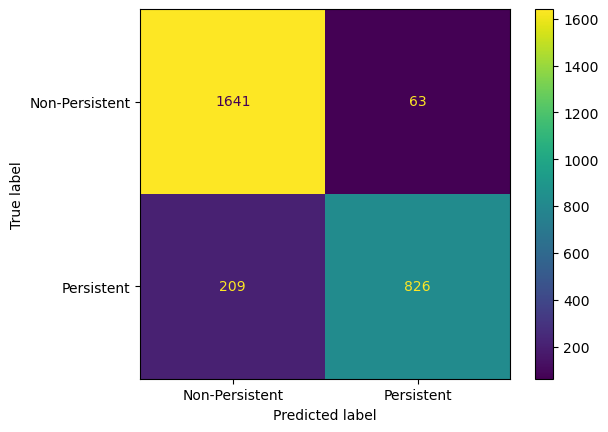

In [58]:
# Make predictions on Train data to see how well model is learning
y_train_pred = best_cat_model.predict(X_train)

# Evaluate accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_train, y_train_pred))

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Non-Persistent", "Persistent"])

cm_display.plot()
plt.show()

# Testing CatBoost Model on train data

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       431
           1       0.78      0.69      0.73       254

    accuracy                           0.81       685
   macro avg       0.80      0.79      0.79       685
weighted avg       0.81      0.81      0.81       685



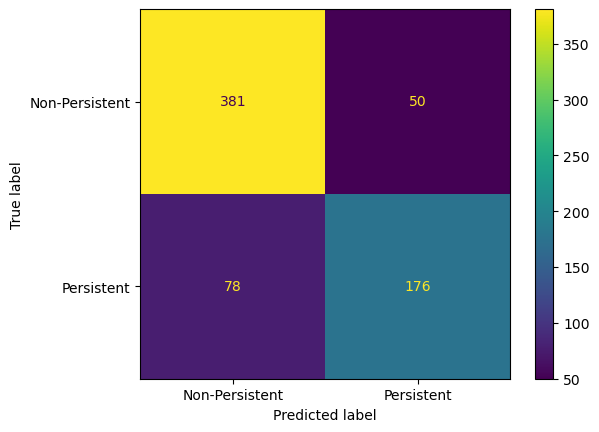

In [59]:
# Make predictions on test data
y_pred = best_cat_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Non-Persistent", "Persistent"])

cm_display.plot()
plt.show()

# Random Forest Classifier

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       431
           1       0.78      0.65      0.71       254

    accuracy                           0.80       685
   macro avg       0.80      0.77      0.78       685
weighted avg       0.80      0.80      0.80       685



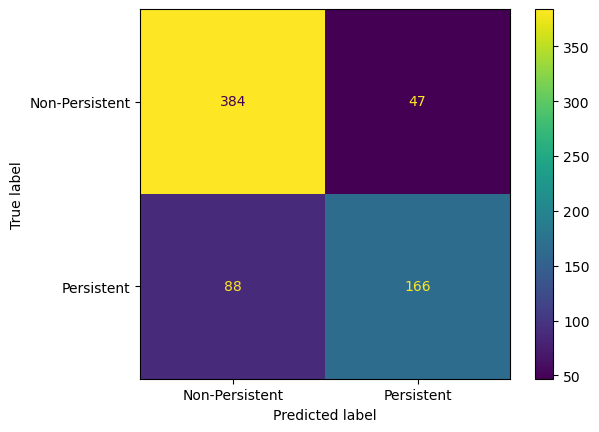

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 500, 800],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

In [66]:
# Get feature importances
feature_importance_rf = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_rf_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Top 5 most important features:")
print(feature_importance_rf_df[:5])
print("5 Least important features")
print(feature_importance_rf_df[-5:])

Top 5 most important features:
                                              Feature  Importance
10                                Dexa_Freq_During_Rx    0.224341
11                                     Dexa_During_Rx    0.121570
29              Comorb_Long_Term_Current_Drug_Therapy    0.067498
24                  Comorb_Encounter_For_Immunization    0.041250
23  Comorb_Encounter_For_Screening_For_Malignant_N...    0.038975
5 Least important features
                                   Feature  Importance
64                     Risk_Immobilization    0.000301
48            Risk_Osteogenesis_Imperfecta    0.000072
52          Risk_Untreated_Early_Menopause    0.000032
63                Risk_Estrogen_Deficiency    0.000020
50  Risk_Untreated_Chronic_Hyperthyroidism    0.000019


# Testing the model on training data

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1704
           1       0.93      0.80      0.86      1035

    accuracy                           0.90      2739
   macro avg       0.91      0.88      0.89      2739
weighted avg       0.90      0.90      0.90      2739



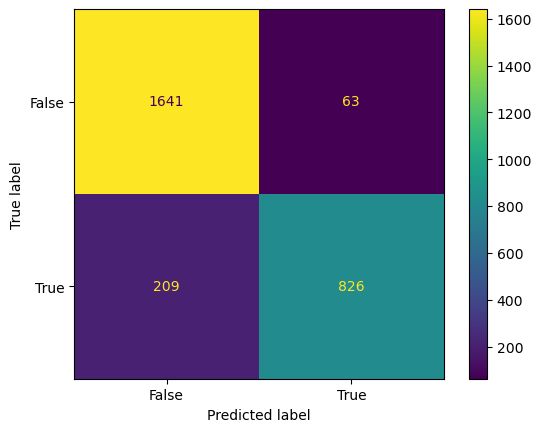

In [29]:
# Make predictions on training data to check how well model is learning
y_pred = best_rf_model.predict(X_train)

# Evaluate accuracy
accuracy = metrics.accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", metrics.classification_report(y_train, y_train_pred))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

# Testing the model on test data

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       431
           1       0.78      0.65      0.71       254

    accuracy                           0.80       685
   macro avg       0.80      0.77      0.78       685
weighted avg       0.80      0.80      0.80       685



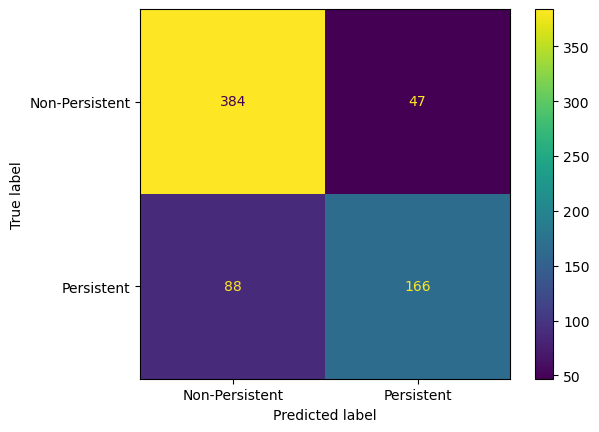

In [30]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Persistent", "Persistent"])
cm_display.plot()
plt.show()